In [3]:
import torch
import json
from munch import DefaultMunch
import danns_eg.resnets as resnets
from danns_eg.data.cifar import get_cifar_dataloaders
from danns_eg.data.mnist import get_sparse_mnist_dataloaders
from torch.cuda.amp import GradScaler, autocast
import tqdm
from torch.nn import CrossEntropyLoss
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np


In [12]:
# Load json file
no_ln_g_prime = []
ln_g_prime = []
approx_ln_g_prime = []
layer = 6
for seed in range(10,20):
    if seed > 16:
        continue
    with open(f'none_baseline/model_resnet50_lr_0.1_wd_1e-06_m_0.9_norm_None_epochs_50_seed_10_lagrangian_False.json_G_Prime_new_seed_{seed}_ics_layer_{layer}.json', 'r') as f:
        no_ln_g_prime.append(json.load(f))

    with open(f'ln_baseline/model_resnet50_lr_0.1_wd_0.001_m_0.9_norm_ln_epochs_50_seed_10_lagrangian_False.json_G_Prime_new_seed_{seed}_ics_layer_{layer}.json', 'r') as f:
        ln_g_prime.append(json.load(f))

    with open(f'approx_ln_baseline/model_resnet50_lr_0.1_wd_0.001_m_0.9_norm_ln_epochs_50_seed_10_lagrangian_True_lambda_mu_0.1_lambda_var_0.1.json_G_Prime_new_seed_{seed}_ics_layer_{layer}.json', 'r') as f:
        approx_ln_g_prime.append(json.load(f))

In [13]:
num_of_seeds = 6
for seed in range(num_of_seeds):
    for key, value in no_ln_g_prime[seed].items():
        if key != "test_accs":
            no_ln_g_prime[seed][key]['mse'] = np.array(no_ln_g_prime[seed][key]['mse'])
            no_ln_g_prime[seed][key]['cosine'] = np.array(no_ln_g_prime[seed][key]['cosine'])[:48]
        else:
            no_ln_g_prime[seed][key] = np.array(value)

    for key, value in ln_g_prime[seed].items():
        if key != "test_accs":
            ln_g_prime[seed][key]['mse'] = np.array(ln_g_prime[seed][key]['mse'])
            ln_g_prime[seed][key]['cosine'] = np.array(ln_g_prime[seed][key]['cosine'])[:48]
        else:
            ln_g_prime[seed][key] = np.array(value)
        
    for key, value in approx_ln_g_prime[seed].items():
        if key != "test_accs":
            approx_ln_g_prime[seed][key]['mse'] = np.array(approx_ln_g_prime[seed][key]['mse'])
            approx_ln_g_prime[seed][key]['cosine'] = np.array(approx_ln_g_prime[seed][key]['cosine'])[:48]
        else:
            approx_ln_g_prime[seed][key] = np.array(value)
    

In [ ]:
ln_g_prime

In [14]:
# Average the list into one
for seed in range(1, num_of_seeds):
    print(seed)
    no_ln_g_prime[0]['module_dict.6.module_dict.0.Wei']['mse']=np.vstack([no_ln_g_prime[0]['module_dict.6.module_dict.0.Wei']['mse'], no_ln_g_prime[seed]['module_dict.6.module_dict.0.Wei']['mse']])
    no_ln_g_prime[0]['module_dict.6.module_dict.0.Wex']['mse']=np.vstack([no_ln_g_prime[0]['module_dict.6.module_dict.0.Wex']['mse'], no_ln_g_prime[seed]['module_dict.6.module_dict.0.Wex']['mse']])
    no_ln_g_prime[0]['module_dict.6.module_dict.0.Wix']['mse']=np.vstack([no_ln_g_prime[0]['module_dict.6.module_dict.0.Wix']['mse'], no_ln_g_prime[seed]['module_dict.6.module_dict.0.Wix']['mse']])
    no_ln_g_prime[0]['module_dict.6.module_dict.0.Wei']['cosine']=np.vstack([no_ln_g_prime[0]['module_dict.6.module_dict.0.Wei']['cosine'], no_ln_g_prime[seed]['module_dict.6.module_dict.0.Wei']['cosine']])
    no_ln_g_prime[0]['module_dict.6.module_dict.0.Wex']['cosine']=np.vstack([no_ln_g_prime[0]['module_dict.6.module_dict.0.Wex']['cosine'], no_ln_g_prime[seed]['module_dict.6.module_dict.0.Wex']['cosine']])
    no_ln_g_prime[0]['module_dict.6.module_dict.0.Wix']['cosine']=np.vstack([no_ln_g_prime[0]['module_dict.6.module_dict.0.Wix']['cosine'], no_ln_g_prime[seed]['module_dict.6.module_dict.0.Wix']['cosine']])
    no_ln_g_prime[0]['test_accs']=np.vstack([no_ln_g_prime[0]['test_accs'], no_ln_g_prime[seed]['test_accs']])

    ln_g_prime[0]['module_dict.6.module_dict.0.Wei']['mse']=np.vstack([ln_g_prime[0]['module_dict.6.module_dict.0.Wei']['mse'], ln_g_prime[seed]['module_dict.6.module_dict.0.Wei']['mse']])
    ln_g_prime[0]['module_dict.6.module_dict.0.Wex']['mse']=np.vstack([ln_g_prime[0]['module_dict.6.module_dict.0.Wex']['mse'], ln_g_prime[seed]['module_dict.6.module_dict.0.Wex']['mse']])
    ln_g_prime[0]['module_dict.6.module_dict.0.Wix']['mse']=np.vstack([ln_g_prime[0]['module_dict.6.module_dict.0.Wix']['mse'], ln_g_prime[seed]['module_dict.6.module_dict.0.Wix']['mse']])
    ln_g_prime[0]['module_dict.6.module_dict.0.Wei']['cosine']=np.vstack([ln_g_prime[0]['module_dict.6.module_dict.0.Wei']['cosine'], ln_g_prime[seed]['module_dict.6.module_dict.0.Wei']['cosine']])
    ln_g_prime[0]['module_dict.6.module_dict.0.Wex']['cosine']=np.vstack([ln_g_prime[0]['module_dict.6.module_dict.0.Wex']['cosine'], ln_g_prime[seed]['module_dict.6.module_dict.0.Wex']['cosine']])
    ln_g_prime[0]['module_dict.6.module_dict.0.Wix']['cosine']=np.vstack([ln_g_prime[0]['module_dict.6.module_dict.0.Wix']['cosine'], ln_g_prime[seed]['module_dict.6.module_dict.0.Wix']['cosine']])
    ln_g_prime[0]['test_accs']=np.vstack([ln_g_prime[0]['test_accs'], ln_g_prime[seed]['test_accs']])

    approx_ln_g_prime[0]['module_dict.6.module_dict.0.Wei']['mse']=np.vstack([approx_ln_g_prime[0]['module_dict.6.module_dict.0.Wei']['mse'], approx_ln_g_prime[seed]['module_dict.6.module_dict.0.Wei']['mse']])
    approx_ln_g_prime[0]['module_dict.6.module_dict.0.Wex']['mse']=np.vstack([approx_ln_g_prime[0]['module_dict.6.module_dict.0.Wex']['mse'], approx_ln_g_prime[seed]['module_dict.6.module_dict.0.Wex']['mse']])
    approx_ln_g_prime[0]['module_dict.6.module_dict.0.Wix']['mse']=np.vstack([approx_ln_g_prime[0]['module_dict.6.module_dict.0.Wix']['mse'], approx_ln_g_prime[seed]['module_dict.6.module_dict.0.Wix']['mse']])
    approx_ln_g_prime[0]['module_dict.6.module_dict.0.Wei']['cosine']=np.vstack([approx_ln_g_prime[0]['module_dict.6.module_dict.0.Wei']['cosine'], approx_ln_g_prime[seed]['module_dict.6.module_dict.0.Wei']['cosine']])
    approx_ln_g_prime[0]['module_dict.6.module_dict.0.Wex']['cosine']=np.vstack([approx_ln_g_prime[0]['module_dict.6.module_dict.0.Wex']['cosine'], approx_ln_g_prime[seed]['module_dict.6.module_dict.0.Wex']['cosine']])
    approx_ln_g_prime[0]['module_dict.6.module_dict.0.Wix']['cosine']=np.vstack([approx_ln_g_prime[0]['module_dict.6.module_dict.0.Wix']['cosine'], approx_ln_g_prime[seed]['module_dict.6.module_dict.0.Wix']['cosine']])
    approx_ln_g_prime[0]['test_accs']=np.vstack([approx_ln_g_prime[0]['test_accs'], approx_ln_g_prime[seed]['test_accs']])

no_ln_g_prime = no_ln_g_prime[0]
ln_g_prime = ln_g_prime[0]
approx_ln_g_prime = approx_ln_g_prime[0]

1
2
3
4
5


In [15]:
no_ln_g_prime.keys()

dict_keys(['module_dict.3.module_dict.0.Wex', 'module_dict.3.module_dict.0.Wix', 'module_dict.3.module_dict.0.Wei', 'test_accs'])

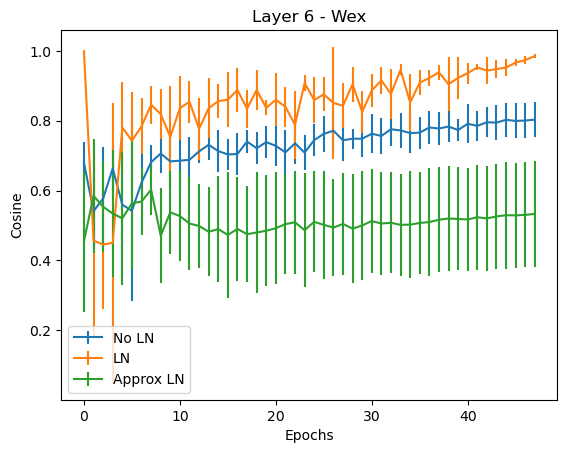

In [15]:
target_weight = 'Wex'

y = no_ln_g_prime[f'module_dict.6.module_dict.0.{target_weight}']['cosine'].mean(axis=0) #, label='No LN')
yerr = no_ln_g_prime[f'module_dict.6.module_dict.0.{target_weight}']['cosine'].std(axis=0)
plt.errorbar(range(len(y)), y, yerr=yerr, fmt='-,', label = 'No LN')
y = ln_g_prime[f'module_dict.6.module_dict.0.{target_weight}']['cosine'].mean(axis=0) #, label='No LN')
yerr = ln_g_prime[f'module_dict.6.module_dict.0.{target_weight}']['cosine'].std(axis=0)
plt.errorbar(range(len(y)), y, yerr=yerr, fmt='-,', label = 'LN')
y = approx_ln_g_prime[f'module_dict.6.module_dict.0.{target_weight}']['cosine'].mean(axis=0) #, label='No LN')
yerr = approx_ln_g_prime[f'module_dict.6.module_dict.0.{target_weight}']['cosine'].std(axis=0)
plt.errorbar(range(len(y)), y, yerr=yerr, fmt='-,', label = 'Approx LN')
#plt.plot(ln_g_prime[f'module_dict.3.module_dict.0.{target_weight}']['cosine']/num_of_seeds,label='LN')
#plt.plot(approx_ln_g_prime[f'module_dict.3.module_dict.0.{target_weight}']['cosine']/num_of_seeds, label='Approx LN')
plt.xlabel('Epochs')
plt.ylabel('Cosine')
#plt.yscale('log')
plt.title(f'Layer {layer} - {target_weight}')
plt.legend()

/home/mila/r/roy.eyono/.conda/envs/ffcv_eg/lib/python3.9/site-packages/numpy/core/_methods.py:233: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


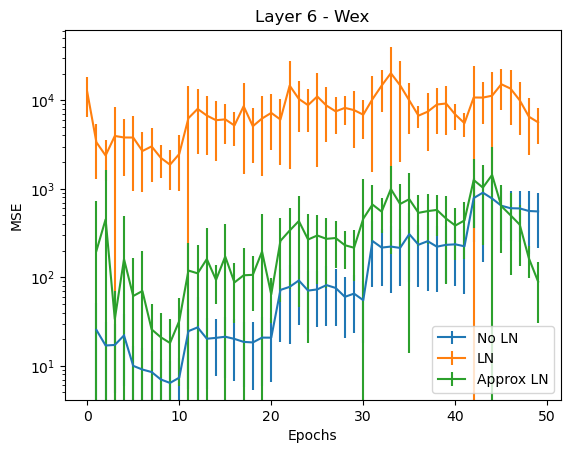

In [25]:

y = no_ln_g_prime[f'module_dict.6.module_dict.0.{target_weight}']['mse'].mean(axis=0) #, label='No LN')
yerr = no_ln_g_prime[f'module_dict.6.module_dict.0.{target_weight}']['mse'].std(axis=0)
plt.errorbar(range(len(y)), y, yerr=yerr, fmt='-,', label = 'No LN')
y = ln_g_prime[f'module_dict.6.module_dict.0.{target_weight}']['mse'].mean(axis=0) #, label='No LN')
yerr = ln_g_prime[f'module_dict.6.module_dict.0.{target_weight}']['mse'].std(axis=0)
plt.errorbar(range(len(y)), y, yerr=yerr, fmt='-,', label = 'LN')
y = approx_ln_g_prime[f'module_dict.6.module_dict.0.{target_weight}']['mse'].mean(axis=0) #, label='No LN')
yerr = approx_ln_g_prime[f'module_dict.6.module_dict.0.{target_weight}']['mse'].std(axis=0)
plt.errorbar(range(len(y)), y, yerr=yerr, fmt='-,', label = 'Approx LN')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.yscale('log')
plt.title(f'Layer {layer} - {target_weight}')
plt.legend()

In [30]:
ln_g_prime['test_accs'][3]

array([32.5 , 39.45, 52.51, 55.09, 53.67, 64.6 , 67.71, 68.31, 69.49,
       70.77, 68.35, 63.44, 57.56, 53.97, 55.77, 50.82, 49.25, 50.49,
       53.17, 53.92, 51.86, 52.14, 47.32, 52.47, 51.91, 50.63, 47.52,
       51.39, 48.18, 50.84, 53.45, 51.16, 50.59, 51.7 , 52.97, 53.28,
       53.96, 53.27, 55.11, 55.43, 55.13, 54.12, 55.27, 55.79, 55.44,
       55.79, 56.35, 57.23, 56.95, 56.83])

Max No LN: 87.94166666666666
Max LN: 89.82


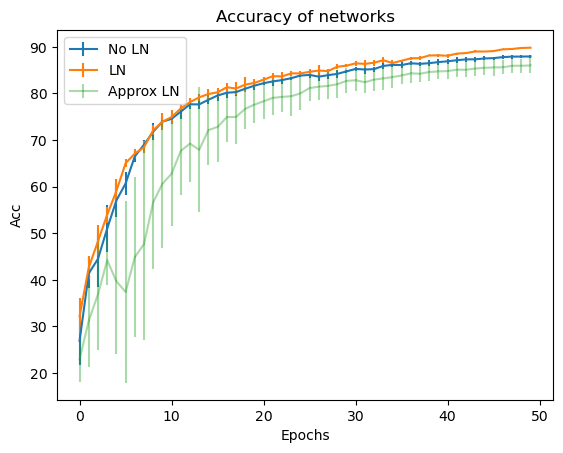

In [16]:
y = no_ln_g_prime['test_accs'].mean(axis=0) #, label='No LN')
yerr = no_ln_g_prime['test_accs'].std(axis=0)
print(f'Max No LN: {max(y)}')
plt.errorbar(range(len(y)), y, yerr=yerr, fmt='-,', label = 'No LN')
y = ln_g_prime['test_accs'].mean(axis=0) #, label='No LN')
yerr = ln_g_prime['test_accs'].std(axis=0)
print(f'Max LN: {max(y)}')
plt.errorbar(range(len(y)), y, yerr=yerr, fmt='-,', label = 'LN')
yerr = approx_ln_g_prime['test_accs'].std(axis=0)
y = approx_ln_g_prime['test_accs'].mean(axis=0) #, label='No LN')
plt.errorbar(range(len(y)), y, yerr=yerr, fmt='-,', alpha=0.4, label = 'Approx LN')
# plt.plot(no_ln_g_prime['test_accs']/num_of_seeds, label='No LN')
# plt.plot(ln_g_prime['test_accs']/num_of_seeds,label='LN')
# plt.plot(approx_ln_g_prime['test_accs']/num_of_seeds, label='Approx LN')
plt.xlabel('Epochs')
plt.ylabel('Acc')
#plt.yscale('log')
plt.title(f'Accuracy of networks')
plt.legend()

In [2]:
# Load json file
with open('model_resnet50_lr_0.1_wd_0.0001_m_0.9_norm_ln_epochs_50_seed_0_lagrangian_True.json', 'r') as f:
    model_json = json.load(f)


In [3]:
# Load model weights
cfg = DefaultMunch.fromDict(model_json)
model = resnets.resnet9_kakaobrain(cfg)
model.load_state_dict(torch.load('model_resnet50_lr_0.1_wd_0.0001_m_0.9_norm_ln_epochs_50_seed_0_lagrangian_True.pt'))

<All keys matched successfully>

In [4]:

results = {"test_accs" :[], "test_losses": [], 
                "train_accs" :[], "train_losses":[], "ep_i":[],
                "model_norm":[], "train_local_losses":[], "test_local_losses":[]}

In [5]:
def get_dataloaders(p):
    if "cifar" in p.train.dataset : return get_cifar_dataloaders(p) 
    elif "mnist" in p.train.dataset : return get_sparse_mnist_dataloaders(p)
    else:print(f"ERROR: {p.train.dataset} not recognised as a vaild dataset")


In [6]:
loaders = get_dataloaders(cfg)
loss_fn_sum = CrossEntropyLoss(label_smoothing=0.1, reduction='sum')

Info: not subtracting the mean!


100%|██████████| 10000/10000 [00:00<00:00, 99732.59it/s]


In [7]:
def eval_model(epoch, model, loaders, loss_fn_sum, p):
    model.eval()
    with torch.no_grad():
        train_correct, n_train, train_loss, train_local_loss = 0., 0., 0., 0.
        for ims, labs in loaders['train_eval']:
            with autocast():
                num_of_local_layers = 0
                out = model(ims)
                loss_val = loss_fn_sum(out, labs)
                train_loss += loss_val
                #print(f"Global Loss: {loss_val.item()}")
                train_correct += out.argmax(1).eq(labs).sum().cpu().item()
                n_train += ims.shape[0]
                loc_loss = 0.0
                for name, param in model.named_parameters():
                    if 'local_loss_value' in name:
                        if param.item() > 0:
                            loc_loss += param.item()
                            num_of_local_layers += 1
                if num_of_local_layers > 0:
                    loc_loss /= num_of_local_layers
                    train_local_loss += loc_loss
        train_acc = train_correct / n_train * 100
        train_loss /=  n_train
        train_local_loss /= n_train
        
        test_correct, n_test, test_loss, test_local_loss = 0., 0., 0., 0.
        for ims, labs in loaders['test']:
            with autocast():
                # out = (model(ims) + model(ch.fliplr(ims))) / 2. # Test-time augmentation
                num_of_local_layers = 0
                out = model(ims)
                loss_val = loss_fn_sum(out, labs)
                test_loss += loss_val
                #print(f"Global Loss: {loss_val.item()}")
                test_correct += out.argmax(1).eq(labs).sum().cpu().item()
                n_test += ims.shape[0]
                loc_loss = 0.0
                for name, param in model.named_parameters():
                    if 'local_loss_value' in name:
                        if param.item() > 0:
                            loc_loss += param.item()
                            num_of_local_layers += 1

                if num_of_local_layers > 0:
                    loc_loss /= num_of_local_layers
                    test_local_loss += loc_loss

        #print("Not currently running train eval!")
        test_acc = test_correct / n_test * 100
        test_loss /=  n_test
        test_local_loss /= n_test

        results["test_accs"].append(test_acc)
        results["test_losses"].append(test_loss.cpu().item())
        results["train_accs"].append(train_acc)
        results["train_losses"].append(train_loss.cpu().item())
        results["train_local_losses"].append(train_local_loss)
        results["test_local_losses"].append(test_local_loss)
        results["ep_i"].append(epoch)

In [8]:
progress_bar = tqdm(range(1,1+cfg.train.epochs))

log_epochs = 5
    
for epoch in progress_bar:
    if epoch%log_epochs==0:
        eval_model(epoch, model, loaders, loss_fn_sum, cfg)          
        progress_bar.set_description("Train/test accuracy after {} epochs: {:.2f}/{:.2f}".format(epoch,results["train_accs"][-1],results["test_accs"][-1]))

Train/test accuracy after 50 epochs: 10.00/10.00: 100%|██████████| 50/50 [00:29<00:00,  1.67it/s]


In [9]:
results

{'test_accs': [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0],
 'test_losses': [2.302670955657959,
  2.302670955657959,
  2.302670955657959,
  2.302670955657959,
  2.302670955657959,
  2.302670955657959,
  2.302670955657959,
  2.302670955657959,
  2.302670955657959,
  2.302670955657959],
 'train_accs': [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0],
 'train_losses': [2.302670955657959,
  2.302670955657959,
  2.302670955657959,
  2.302670955657959,
  2.302670955657959,
  2.302670955657959,
  2.302670955657959,
  2.302670955657959,
  2.302670955657959,
  2.302670955657959],
 'ep_i': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
 'model_norm': [],
 'train_local_losses': [803.502332468357,
  803.502332468357,
  803.502332468357,
  803.502332468357,
  803.502332468357,
  803.502332468357,
  803.502332468357,
  803.502332468357,
  803.502332468357,
  803.502332468357],
 'test_local_losses': [819.9003392534256,
  819.9003392534256,
  819.9003392534256,
  819.900339253425